# [프로젝트3] 데이터 전처리 및 상관관계 확인하기


---


## 프로젝트 목표
---
- 추천 알고리즘에 적용하기 위해 데이터를 전처리합니다. 
- 히트맵(heatmap) 시각화를 통해 데이터의 상관관계를 확인합니다. 


## 프로젝트 목차
---

1. **데이터 불러오기:** 4개의 csv 데이터를 불러옵니다.

2. **데이터 전처리하기:** 추천 알고리즘에 적용하기 위해 데이터를 전처리합니다. 

3. **데이터 상관관계 확인하기:** 전처리한 데이터를 시각화를 통해 데이터간의 상관관계를 확인합니다.

## 프로젝트 개요
---

추천 알고리즘에 적용할 수 있도록 데이터를 전처리하고, 전처리한 데이터를 히트맵(heatmap) 시각화를 통해 데이터 내에 존재하는 상관관계를 확인합니다. 

## 1. 데이터 불러오기
---

판다스 데이터 프레임 형태로 movie, views, question, test 데이터들을 불러들입니다.

In [ ]:
# 판다스 라이브러리 사용을 위해
import pandas as pd

# 데이터 로드 (header=None은 컬럼 이름이 없다는 뜻입니다)
df_movie = pd.read_csv('/mnt/data/chapter_4/MYSUNI_MOVIES.csv', header=None)
df_views = pd.read_csv('/mnt/data/chapter_4/MYSUNI_VIEWS.csv', header=None)
df_question = pd.read_csv('/mnt/data/chapter_4/MYSUNI_QUESTION.csv', header=None)
df_test = pd.read_csv('/mnt/data/chapter_4/MYSUNI_TEST.csv', header=None)

/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0,1,2,3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0,1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## 2. 데이터 전처리하기
---

읽어들인 데이터들을 원하는 형태로 전처리 합니다.

### 2.1 문제 정보 전처리
---

문제 정보 데이터에서 첫 행(열 이름 정보)을 지우고, 데이터 프레임의 열 이름을 `USER_ID`, `MOVIE_ID`, `DURATION`, `WATCH_DAY`, `WATCH_SEQ`으로 지정합니다.

또한, 시청 시간을 계산하기 위해 데이터의 타입을 정수형(int)으로 변경하고, 변경한 시청 시간이 10분 미만이면 0으로, 나머지는 1 값으로 설정합니다.

이렇게 설정함으로써 `DURATION`이 rating의 역할을 하게 됩니다. 

In [ ]:
# 첫 행을 지우기
df_question.drop(index=0, inplace=True)

# 열 이름 정하기
df_question.columns = ['USER_ID', 'MOVIE_ID', 'DURATION', 'WATCH_DAY', 'WATCH_SEQ']

In [ ]:
# 시청 시간을 rating으로 계산하기 위해 데이터 타입 변경

df_question = df_question.astype('int')

In [ ]:
# 시청시간이 10분 미만이면 0으로 변경 (시청하지 않음을 의미)
df_question.loc[df_question.DURATION<10, 'DURATION']=0
# 나머지는 1로 변경 (시청함을 의미)
df_question.loc[df_question.DURATION>0, 'DURATION']=1

In [ ]:
# 전처리 된 데이터 프레임 확인, DURATION이 rating의 역할을 함

df_question

,USER_ID,MOVIE_ID,DURATION,WATCH_DAY,WATCH_SEQ
1,1,4660,1,20210424,1
2,1,6271,0,20210313,1
3,1,1372,1,20210307,1
4,1,14282,1,20210207,1
5,1,1455,1,20210131,1
...,...,...,...,...,...
558696,55894,633,0,20210623,1
558697,55894,13475,1,20210619,4
558698,55894,9909,0,20210619,3
558699,55894,13475,0,20210619,2


`DURATION`의 값이 0 또는 1로 변경된 것을 확인할 수 있습니다.

### 2.2 영화 정보 전처리
---

영화 정보 데이터에서 첫 행(열 이름 정보)을 지우고, 데이터 프레임의 열 이름을 `MOVIE_ID`, `TITLE`, `RELEASE_MONTH` 으로 지정합니다.

또한, `MOVIE_ID`의 데이터 타입을 정수형(int)으로 변경합니다. 

In [ ]:
# 영화 정보에 대해서도 열 이름을 정하고, 첫 행을 지우고, MOVIE_ID의 데이터 타입을 변경함
df_movie.columns = ['MOVIE_ID', 'TITLE', 'RELEASE_MONTH']
df_movie.drop(0, inplace=True)
df_movie = df_movie.astype({'MOVIE_ID': 'int'})

`drop()` 메소드를 사용하여 문제 정보와 영화 정보에서 사용하지 않을 열들을 제거합니다.
- `axis=1`은 열을 제거한다는 의미입니다.
- `inplace=True`는 삭제된 결과를 데이터 프레임에 재할당한다는 의미입니다.

In [ ]:
# 문제 정보, 영화 정보에서 필요 없는 내용들을 제외함
df_question.drop('WATCH_DAY', axis=1, inplace=True)
df_question.drop('WATCH_SEQ', axis=1, inplace=True)
df_movie.drop('RELEASE_MONTH', axis=1, inplace=True)

In [ ]:
# 전처리 된 영화 정보 확인
df_movie

,MOVIE_ID,TITLE
1,0,걸어서하늘까지(1992)
2,1,너와극장에서
3,2,가려진시간[가치봄]
4,3,그링고
5,4,스위치(2010)
...,...,...
14594,14593,영웅:샐러멘더의비밀[감독판]
14595,14594,더로버
14596,14595,메디엄
14597,14596,그린북


`WATCH_DAY`, `WATCH_SEQ`, `RELEASE_MONTH` 열이 삭제되었고, `MOVIE_ID`와 `TITLE` 정보만 남은 것을 확인할 수 있습니다.

In [ ]:
# 전처리 된 문제 정보 확인
df_question

,USER_ID,MOVIE_ID,DURATION
1,1,4660,1
2,1,6271,0
3,1,1372,1
4,1,14282,1
5,1,1455,1
...,...,...,...
558696,55894,633,0
558697,55894,13475,1
558698,55894,9909,0
558699,55894,13475,0


### 2.3 영화 정보와 문제 정보 결합하기
---

`merge()` 메소드를 사용하여 영화 정보와 문제 정보를 결합합니다. 

이때 영화 정보와 문제 정보에 공통으로 존재하는 `MOVIE_ID`를 기준 컬럼으로 사용합니다.

**Tips**: `merge(df1, df2, on='column')`으로 두 데이터 프레임을 결합할 수 있습니다.

### [TODO] `MOVIE_ID`를 기준으로 영화 정보와 문제 정보를 합친 `user_movie_data`를 생성하는 코드를 작성하세요.

In [ ]:
# MOVIE_ID를 기준으로 영화 정보, 문제 정보를 합함
user_movie_data = pd.merge(df_question, df_movie, on = 'MOVIE_ID')
user_movie_data

,USER_ID,MOVIE_ID,DURATION,TITLE
0,1,4660,1,원더풀라이프(1998)
1,647,4660,0,원더풀라이프(1998)
2,38017,4660,0,원더풀라이프(1998)
3,16671,4660,1,원더풀라이프(1998)
4,31970,4660,0,원더풀라이프(1998)
...,...,...,...,...
558695,55137,14102,0,더캐스팅
558696,55508,4908,1,부다페스트로큰롤
558697,55508,4908,0,부다페스트로큰롤
558698,55743,6120,0,헌티드(2018)


새로운 테이블에는 `USER_ID`, `MOVIE_ID`, `DURATION`, `TITLE`에 대한 정보가 있습니다.

### 2.4 rating(`DURATION`) 기준으로 user-movie matrix 생성
---

Rating(`DURATION`)을 기준으로 하여 원하는 user-item matrix를 생성합니다.

In [ ]:
# 필요한 라이브러리 불러오기
import numpy as np
from tqdm import tqdm

# 결합한 user_movie_data를 이용하여 user_movie_rating 행렬을 데이터 프레임 형태로 생성
# columns는 영화의 'TITLE', index는 'USER_ID'로 설정. 이때 unique 메소드로 중복값 처리
user_movie_rating = pd.DataFrame(0, columns=user_movie_data["TITLE"].unique(), index=user_movie_data["USER_ID"].unique())

### [TODO] `user_movie_rating` 행렬을 만드는 for문을 완성하세요.
- `user_movie_data`에서 i번째 줄의 `USER_ID`를 가져오는 코드를 작성하세요.
- `user_movie_data`에서 i번째 줄의 `TITLE`을 가져오는 코드를 작성하세요.
- `user_movie_data`에서 i번째 줄의 `DURATION`을 가져오는 코드를 작성하세요.

**Tips**: `iloc`을 사용하여 i번째 줄의 데이터를 가져올 수 있습니다.

In [ ]:
for i in tqdm(range(user_movie_data.shape[0])):
    # i번째 줄의 USER_ID 가져오기
    cur_user_id = user_movie_data.iloc[i]["USER_ID"]
    # i번째 줄의 TITLE 가져오기
    cur_movie_title = user_movie_data.iloc[i]["TITLE"]
    
    # i번째 줄의 DURATION 가져와서 user_movie_rating 행렬에 저장하기
    user_movie_rating.loc[cur_user_id, cur_movie_title] = user_movie_data.iloc[i]["DURATION"]

# user_movie_rating의 index를 USER_ID 기준으로 정렬
user_movie_rating.sort_index(axis=0, inplace=True)

100%|██████████| 558700/558700 [05:21<00:00, 1735.61it/s]


**Note**: `tqdm`은 반복 작업에서 진행상황을 bar 형태로 보여주는 메소드입니다.

`user_movie_rating` 이름으로 생성된 user-item matrix를 살펴봅니다.
행에는 `USER_ID`가 표시되며 열에는 `영화 이름`이 표시됩니다.

In [ ]:
# user_movie_rating 행렬 확인 
user_movie_rating

,원더풀라이프(1998),레컨,프리즌브레이커스,삼진그룹영어토익반,몬스터호텔3,런,나이브스아웃,"어디갔어,버나뎃",테넷,주먹왕랄프2:인터넷속으로,...,초능력자제레미,나의엔젤,[OCEAN공개]황무지5월의고해,골든슬럼버[가치봄],어라이벌,개인교수2012(2008),더캐스팅,부다페스트로큰롤,헌티드(2018),그여름가장조용한바다
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55895,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55896,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55897,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55898,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 2.5 SVD를 위한 준비
---

SVD를 구하기 위하여 `user_movie_rating` matrix를 transpose 하고 `movie_user_rating` matrix에 저장합니다.

In [ ]:
# user_movie_rating을 transpose하여 movie_user_rating 행렬로 변경
movie_user_rating = user_movie_rating.T

# 생성된 movie_user_rating 행렬 shape 확인
movie_user_rating.shape

(9218, 55870)

In [ ]:
# 필요한 패키지들 로드

from sklearn.decomposition import TruncatedSVD
from scipy.sparse.linalg import svds
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

SVD 연산을 위하여 `movie_user_rating` matrix를 `numpy` 형태의 행렬로 변경합니다.

In [ ]:
# movie_user_rating 행렬을 numpy 형태 행렬로 변경하고 확인
movie_user_rating = movie_user_rating.to_numpy()
type(movie_user_rating)

numpy.ndarray

### 2.6 상위 15개를 이용하여 Truncated SVD 하기
---

`user-item matrix`로부터 얻은 `Full SVD`를 그대로 사용하지 않고 주요한 상위 15개 요소만을 취한 `Truncated SVD`를 구합니다.

### [TODO] Truncated SVD를 수행하는 코드를 작성하세요.
- Truncated SVD를 수행하는 클래스의 객체를 생성하세요.
- 사용하는 components의 개수는 15개입니다.
- `movie_user_rating`에 Truncated SVD를 적용한 행렬을 만드는 코드를 작성하세요.

**Tips**: `TruncatedSVD(n_components=n)` 메소드를 사용하여 n개의 요소만을 취한 Truncated SVD를 구할 수 있습니다.

In [ ]:
# 상위 15개를 이용한 Truncated SVD를 사용하여 movie_user_rating 행렬을 분해하고 행렬 shape 확인
SVD = TruncatedSVD(n_components=15)
matrix = SVD.fit_transform(movie_user_rating)
matrix.shape

In [ ]:
# 행렬의 coefficent를 가지고 correlation을 구함
corr = np.corrcoef(matrix)
corr.shape

/opt/conda/lib/python3.8/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/opt/conda/lib/python3.8/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


(9218, 9218)

## 3. 데이터 상관관계 확인하기
---
Correlation 기반의 heatmap을 살펴봅니다. 

20개의 Correlation으로 heatmap을 그립니다. 

Heatmap의 전체 사이즈를 16x10으로 합니다. 
Heatmap의 밝은 부분이 가장 correlation이 높기 때문에 대각선에 위치한 블록들이 가장 밝은 값을 가집니다.

<AxesSubplot:>

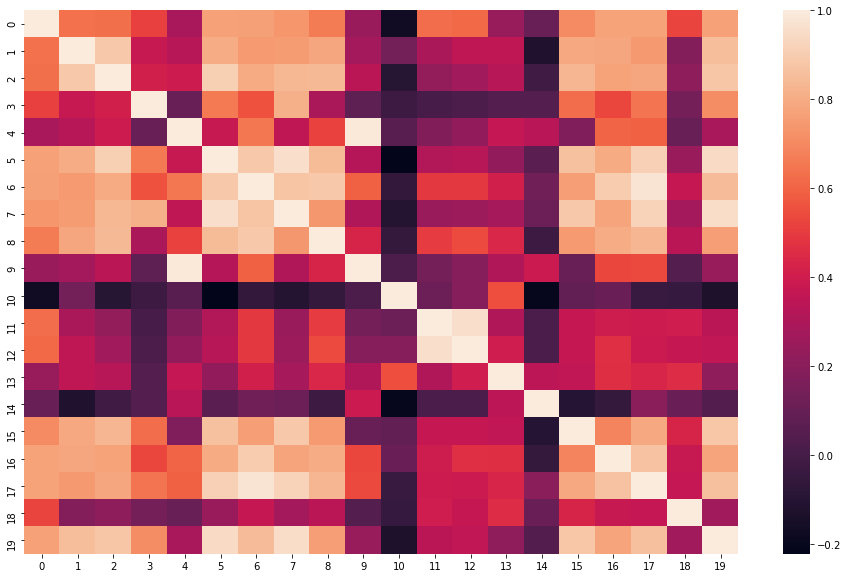

In [ ]:
# correlation에서 20개만으로 heatmap을 그림
corr2 = corr[:20, :20]
plt.figure(figsize=(16, 10))
sns.heatmap(corr2)

200개의 Correlation으로 heatmap을 그립니다. 

Heatmap의 전체 사이즈를 16x10으로 합니다. 마찬가지로 Heatmap의 밝은 부분이 가장 correlation이 높기 때문에 대각선에 위치한 블록들이 가장 밝은 값을 가집니다.

<AxesSubplot:>

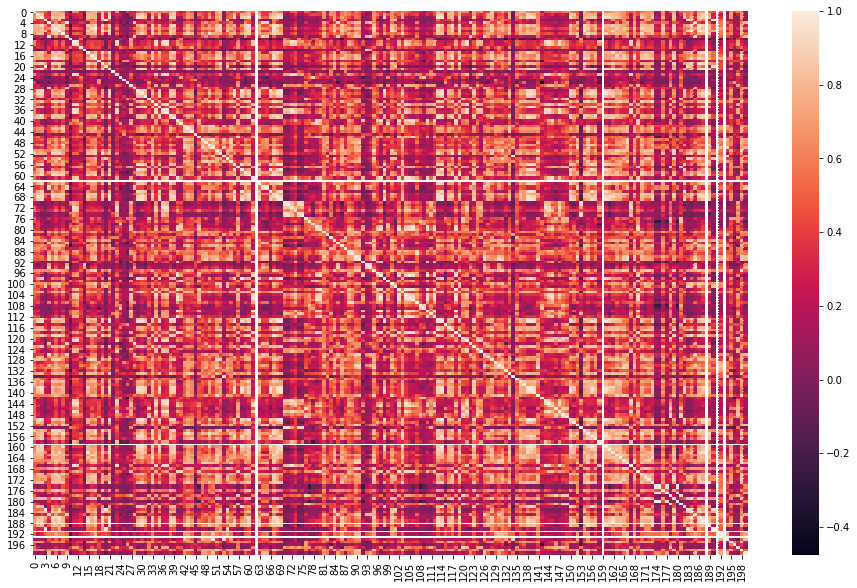

In [ ]:
# correlation에서 200개로 heatmap을 그림
corr2 = corr[:200, :200]
plt.figure(figsize=(16, 10))
sns.heatmap(corr2)

대각선에 위치한 블록들 외에 밝은 값을 가진 블록들은 상관관계가 높은 영화들을 나타냅니다.

다음으로 Query로 사용할 영화를 선택합니다. 아래 예제에서는 `히든피겨스`를 사용하였습니다.

In [ ]:
# 영화 제목을 넣어서 그 영화의 coefficient를 계산 
movie_title = user_movie_rating.columns # 영화 제목 주출
movie_title_list = list(movie_title) # 영화 제목 리스트 생성
coffey_hands = movie_title_list.index('히든피겨스') # Query 영화 선택

Query로 사용할 영화의 `coefficient`를 계산하고 가장 비슷한 영화를 50개 골라냅니다. (0.85이상의 비슷한 영화) 

In [22]:
# 계산된 coefficient 값을 기반으로 가장 비슷한 영화를 골라냄 (item-based cf or content-based filtering)
corr_coffey_hands  = corr[coffey_hands]
list(movie_title[(corr_coffey_hands >= 0.85)])[:50] #5 0개 영화 추출

['나이브스아웃',
 '담보',
 '데몰리션',
 '북스마트',
 '타이타닉(1998)',
 '이웃사촌',
 '밀정',
 '조작된도시',
 '히든피겨스',
 '애프터(2019)',
 '컨테이젼',
 '반지의제왕:반지원정대',
 '반지의제왕2:두개의탑',
 '체르노빌(2018)',
 '자산어보',
 '반지의제왕3:왕의귀환',
 '나우유씨미2',
 '조선명탐정:흡혈괴마의비밀',
 '내일의기억(2021)',
 '나의소녀시대',
 '보헤미안랩소디',
 '나는내일,어제의너와만난다',
 '부라더',
 '원더우먼',
 '안시성',
 '군함도[감독판]',
 '컨저링',
 '콜오브와일드',
 '어느가족',
 '신과함께:죄와벌',
 '가려진시간',
 '오!문희',
 '쟈니잉글리쉬2:네버다이',
 '그린북',
 '코마',
 '청년경찰',
 '그래도좋아해',
 '힘을내요,미스터리',
 '2012',
 '원더풀고스트',
 '해피해피와이너리',
 '스윙키즈',
 '지오스톰',
 '아이캔스피크',
 '나는왕이로소이다',
 '분노의질주',
 '적벽대전1부:거대한전쟁의시작',
 '터널(2016)',
 '플라이트플랜',
 '거북이달린다(2009)']

추천 성능의 향상을 위하여 `coefficient`가 0.9 이상의 비슷한 영화 50개를 골라냅니다.

In [23]:
# 계산된 coefficient 값을 기반으로 가장 비슷한 영화를 골라냄 (item-based cf or content-based filtering)
corr_coffey_hands  = corr[coffey_hands]
list(movie_title[(corr_coffey_hands >= 0.9)])[:50] # 50개 영화 추출

['담보',
 '히든피겨스',
 '애프터(2019)',
 '안시성',
 '군함도[감독판]',
 '콜오브와일드',
 '그린북',
 '2012',
 '아이캔스피크',
 '거북이달린다(2009)',
 '매트릭스3:레볼루션',
 '폭력탈옥']

**Note**: `coefficient`가 0.9 이상인 영화의 개수가 50개 미만이기 때문에 이 조건에 해당하는 모든 영화가 출력됩니다.

---